In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format',lambda x:'{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [132]:
df_customer=pd.read_csv("customers.csv")
df_loans=pd.read_csv("loans.csv")
df_bureau=pd.read_csv("bureau_data.csv")


In [133]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [134]:
df_customer.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [135]:
df=pd.merge(df_customer,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [136]:
df=pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [138]:
df['default'] = df['default'].astype('int32')
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [139]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


In [140]:
X= df.drop("default",axis='columns')
y=df['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)
df_train=pd.concat([X_train,y_train],axis="columns")
df_test=pd.concat([X_test,y_test],axis="columns")
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

### PERFORMING EDA FOR TRAIN DATASET

In [141]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [142]:
df_train.residence_type.unique()
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [143]:
df_train.residence_type.fillna(mode_residence,inplace=True)

/tmp/ipykernel_6534/1744904132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence,inplace=True)


In [144]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [145]:
df_test.residence_type.fillna(mode_residence,inplace=True)
df_test.isna().sum()

/tmp/ipykernel_6534/609330750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence,inplace=True)


cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [146]:
df_train.duplicated().sum()

0

In [147]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [148]:
df_train.head(1)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0


In [149]:
columns_continuous=['age','income','number_of_dependants','years_at_current_address','years_at_current_address',
                 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio',]

columns_categorical=['gender', 'marital_status', 'employment_status','residence_type','city', 'state', 'zipcode',
                     'loan_purpose', 'loan_type','default']

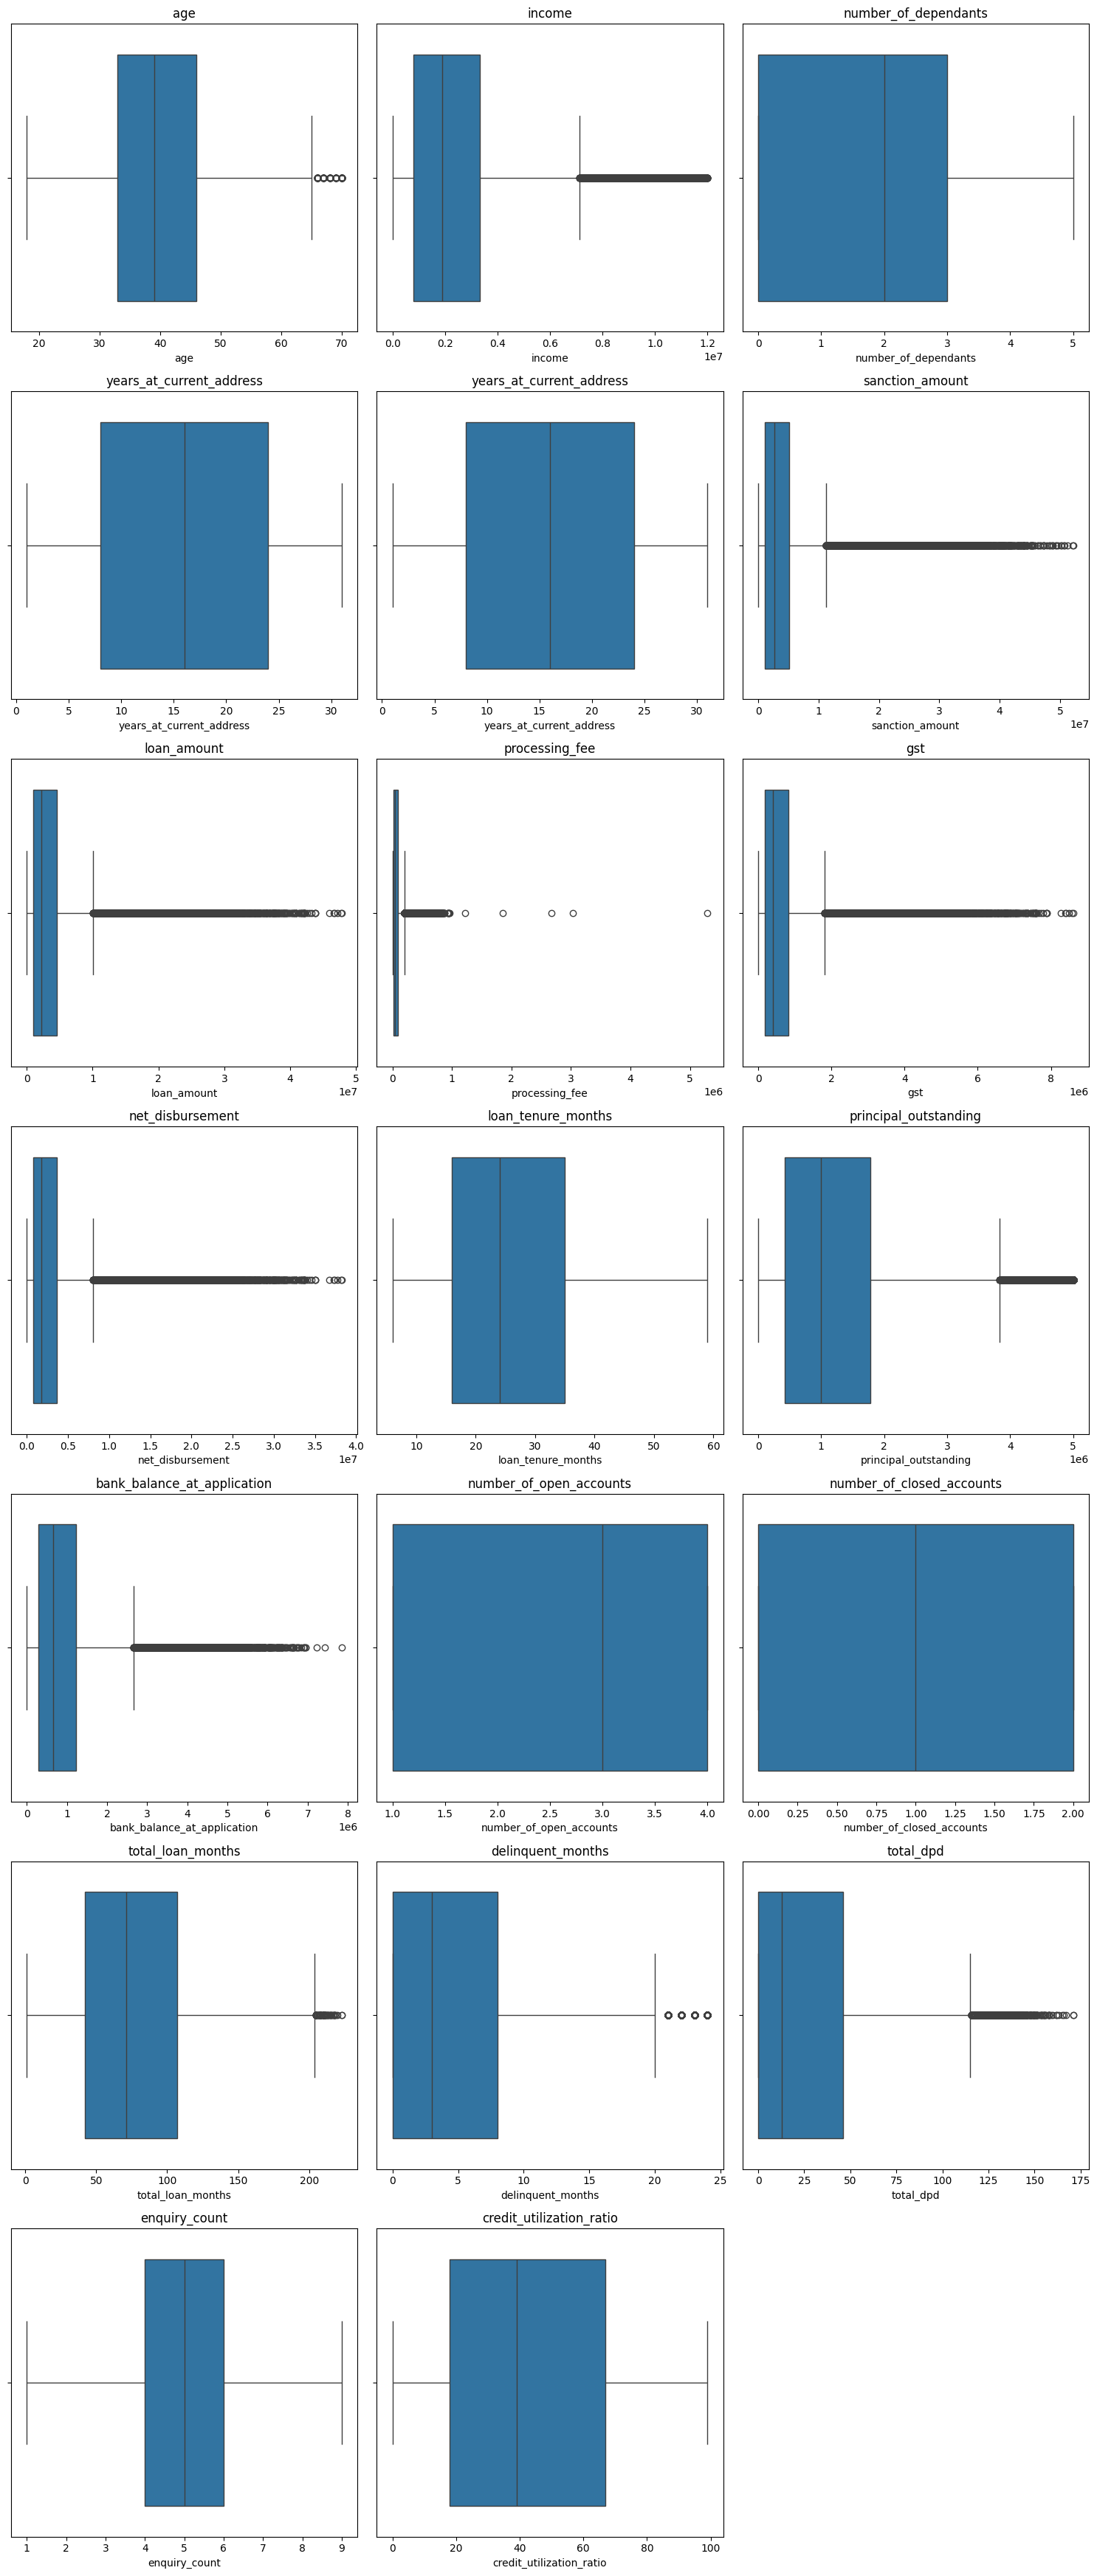

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of plots per row
plots_per_row = 3

# Extract continuous features
continuous_features = columns_continuous

# Determine the number of rows required
num_rows = len(continuous_features) // plots_per_row + int(len(continuous_features) % plots_per_row != 0)

# Set the figure size, you can adjust the width and height based on your preference
plt.figure(figsize=(plots_per_row * 5, num_rows * 5))

# Loop through each feature and create a boxplot
for i, feature in enumerate(continuous_features):
    plt.subplot(num_rows, plots_per_row, i + 1)  # Create subplot
    sns.boxplot(data=df_train, x=feature)  # Plot boxplot
    plt.title(feature)  # Set title for each plot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


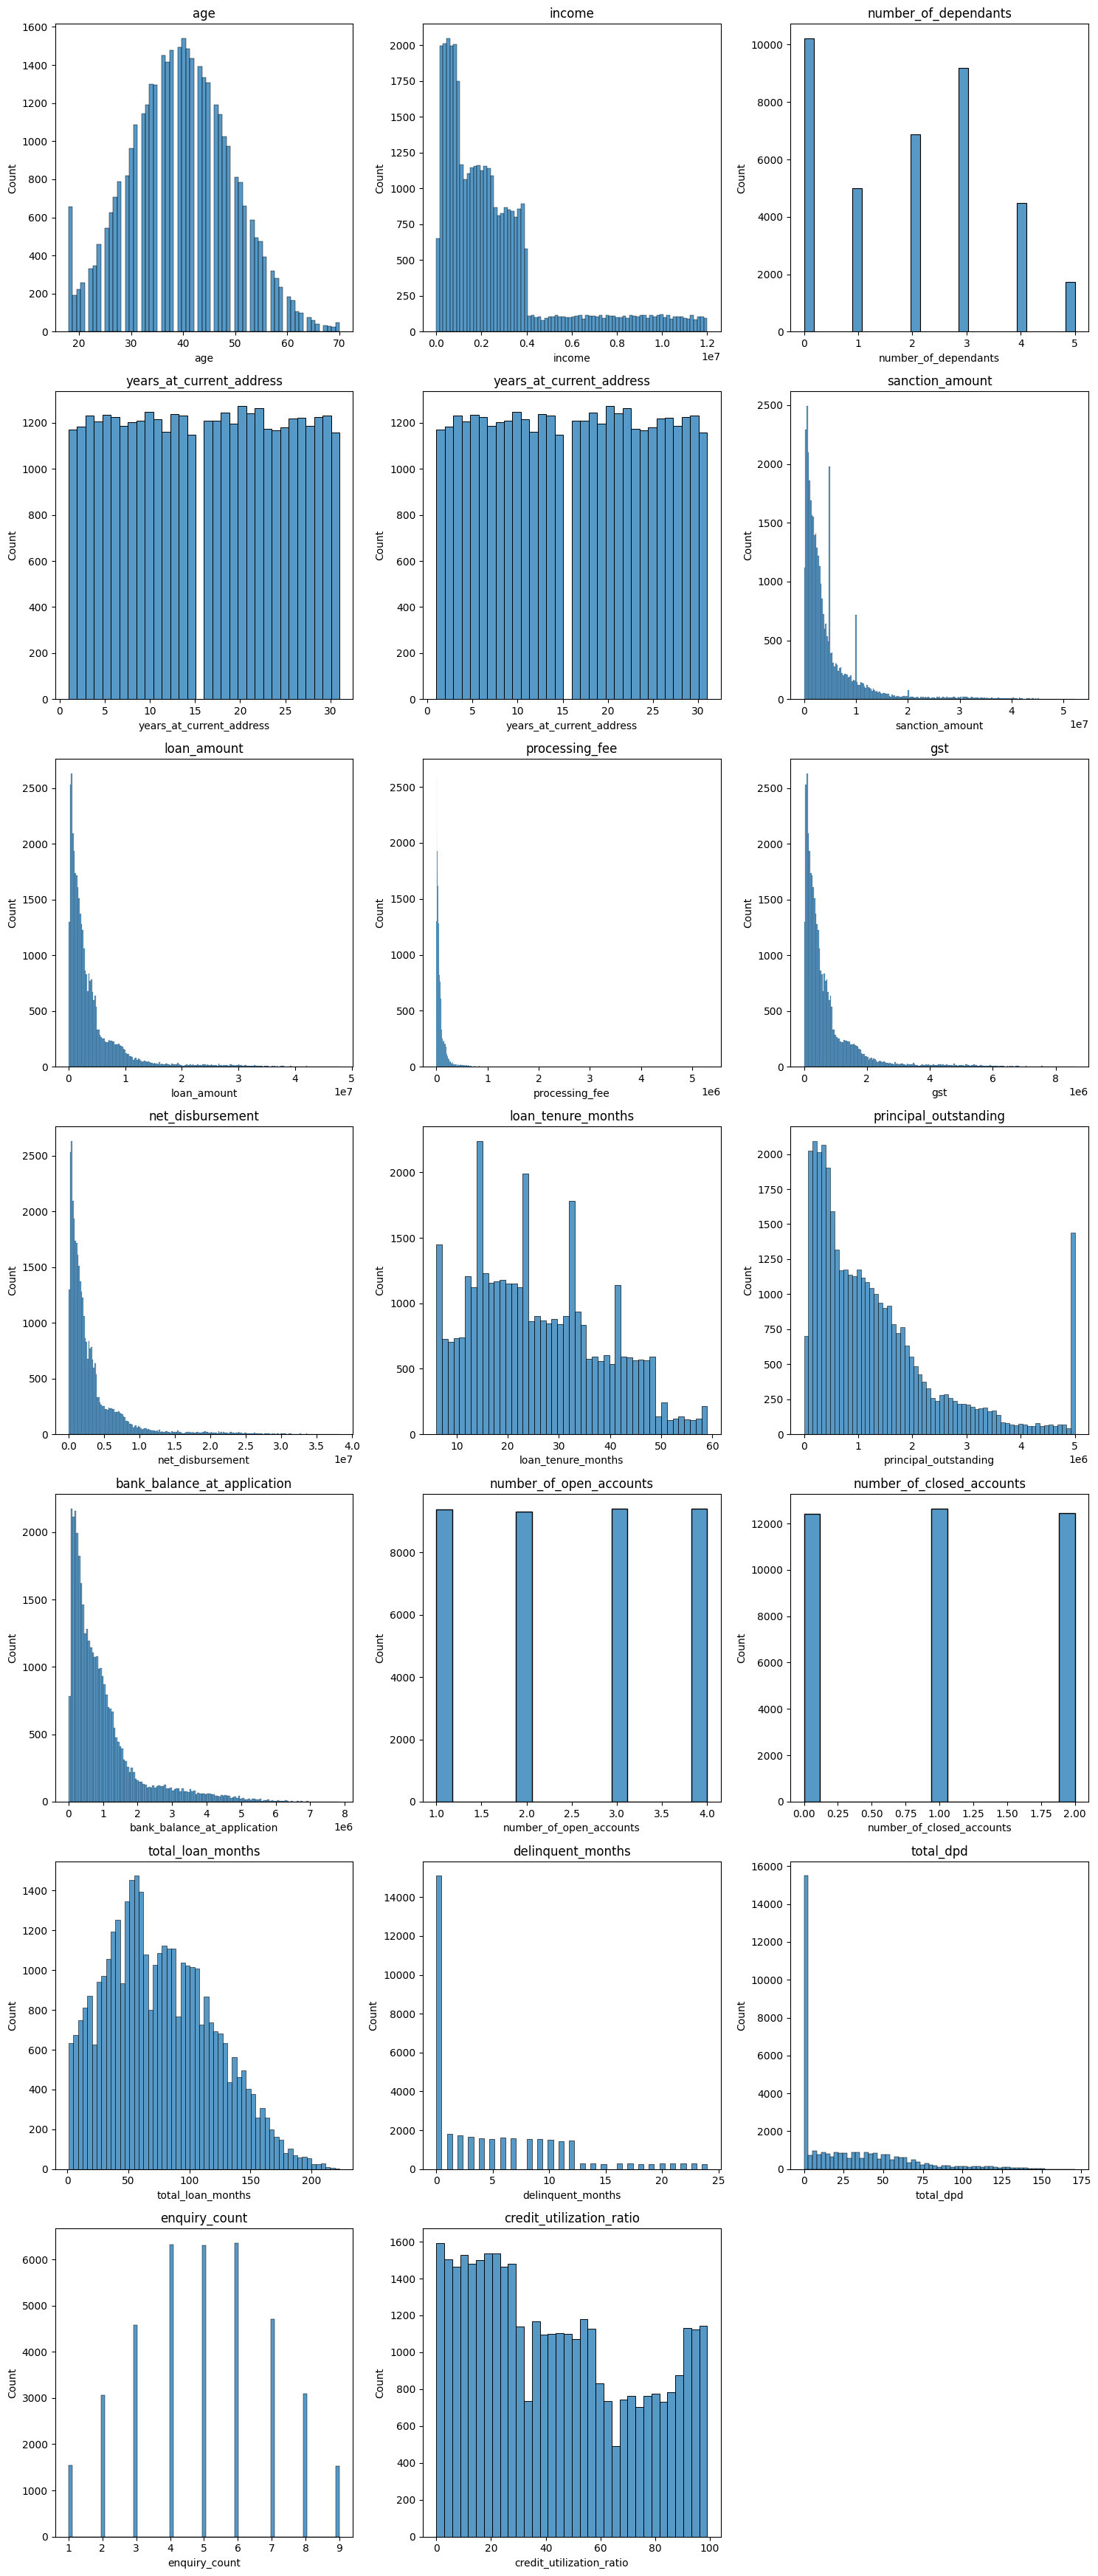

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of plots per row
plots_per_row = 3

# Extract continuous features
continuous_features = columns_continuous

# Determine the number of rows required
num_rows = len(continuous_features) // plots_per_row + int(len(continuous_features) % plots_per_row != 0)

# Set the figure size, you can adjust the width and height based on your preference
plt.figure(figsize=(plots_per_row * 5, num_rows * 5))

# Loop through each feature and create a boxplot
for i, feature in enumerate(continuous_features):
    plt.subplot(num_rows, plots_per_row, i + 1)  # Create subplot
    sns.histplot(data=df_train, x=feature)  # Plot boxplot
    plt.title(feature)  # Set title for each plot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [152]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [153]:
df_train[df_train.processing_fee>0.03*df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [154]:
df_train_1=df_train[df_train.processing_fee<0.03*df_train.loan_amount].copy()
df_train_1[df_train_1.processing_fee>0.03*df_train_1.loan_amount][['loan_amount','processing_fee']]


,loan_amount,processing_fee


In [155]:
df_test_1=df_test[df_test.processing_fee<0.03*df_test.loan_amount].copy()
df_test_1[df_test_1.processing_fee>0.03*df_test_1.loan_amount][['loan_amount','processing_fee']]
df_test_1.shape

(12497, 33)

In [156]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [157]:
for col in columns_categorical:
    print(col,"---------",df_train_1[col].unique())

gender --------- ['M' 'F']
marital_status --------- ['Married' 'Single']
employment_status --------- ['Self-Employed' 'Salaried']
residence_type --------- ['Owned' 'Mortgage' 'Rented']
city --------- ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --------- ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --------- [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --------- ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --------- ['Secured' 'Unsecured']
default --------- [0 1]


In [158]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test_1['loan_purpose']=df_test_1['loan_purpose'].replace('Personaal','Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [159]:
df_train[df_train.gst>0.2*df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee


<h3 align="center" style="color:blue">EXPLORATORY DATA ANALYSIS </h3>


In [160]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [161]:
df_train_1.default.value_counts()

default
0    34265
1     3223
Name: count, dtype: int64

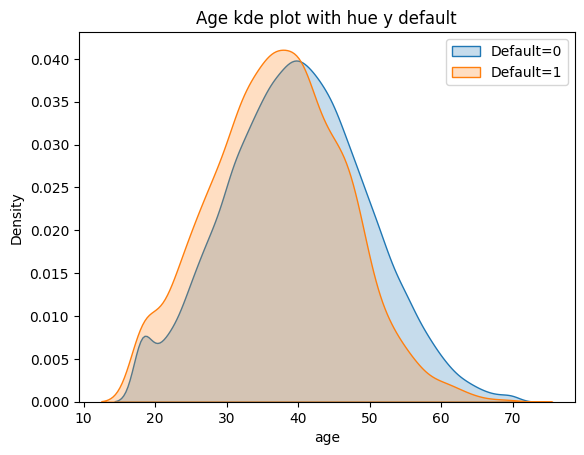

In [162]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True,label="Default=1")
plt.title("Age kde plot with hue y default")
plt.legend()
plt.show()


Insight:
1.Orange graph is little bit shifted to the left of blue graph which indicates that people with young age are more likely to default

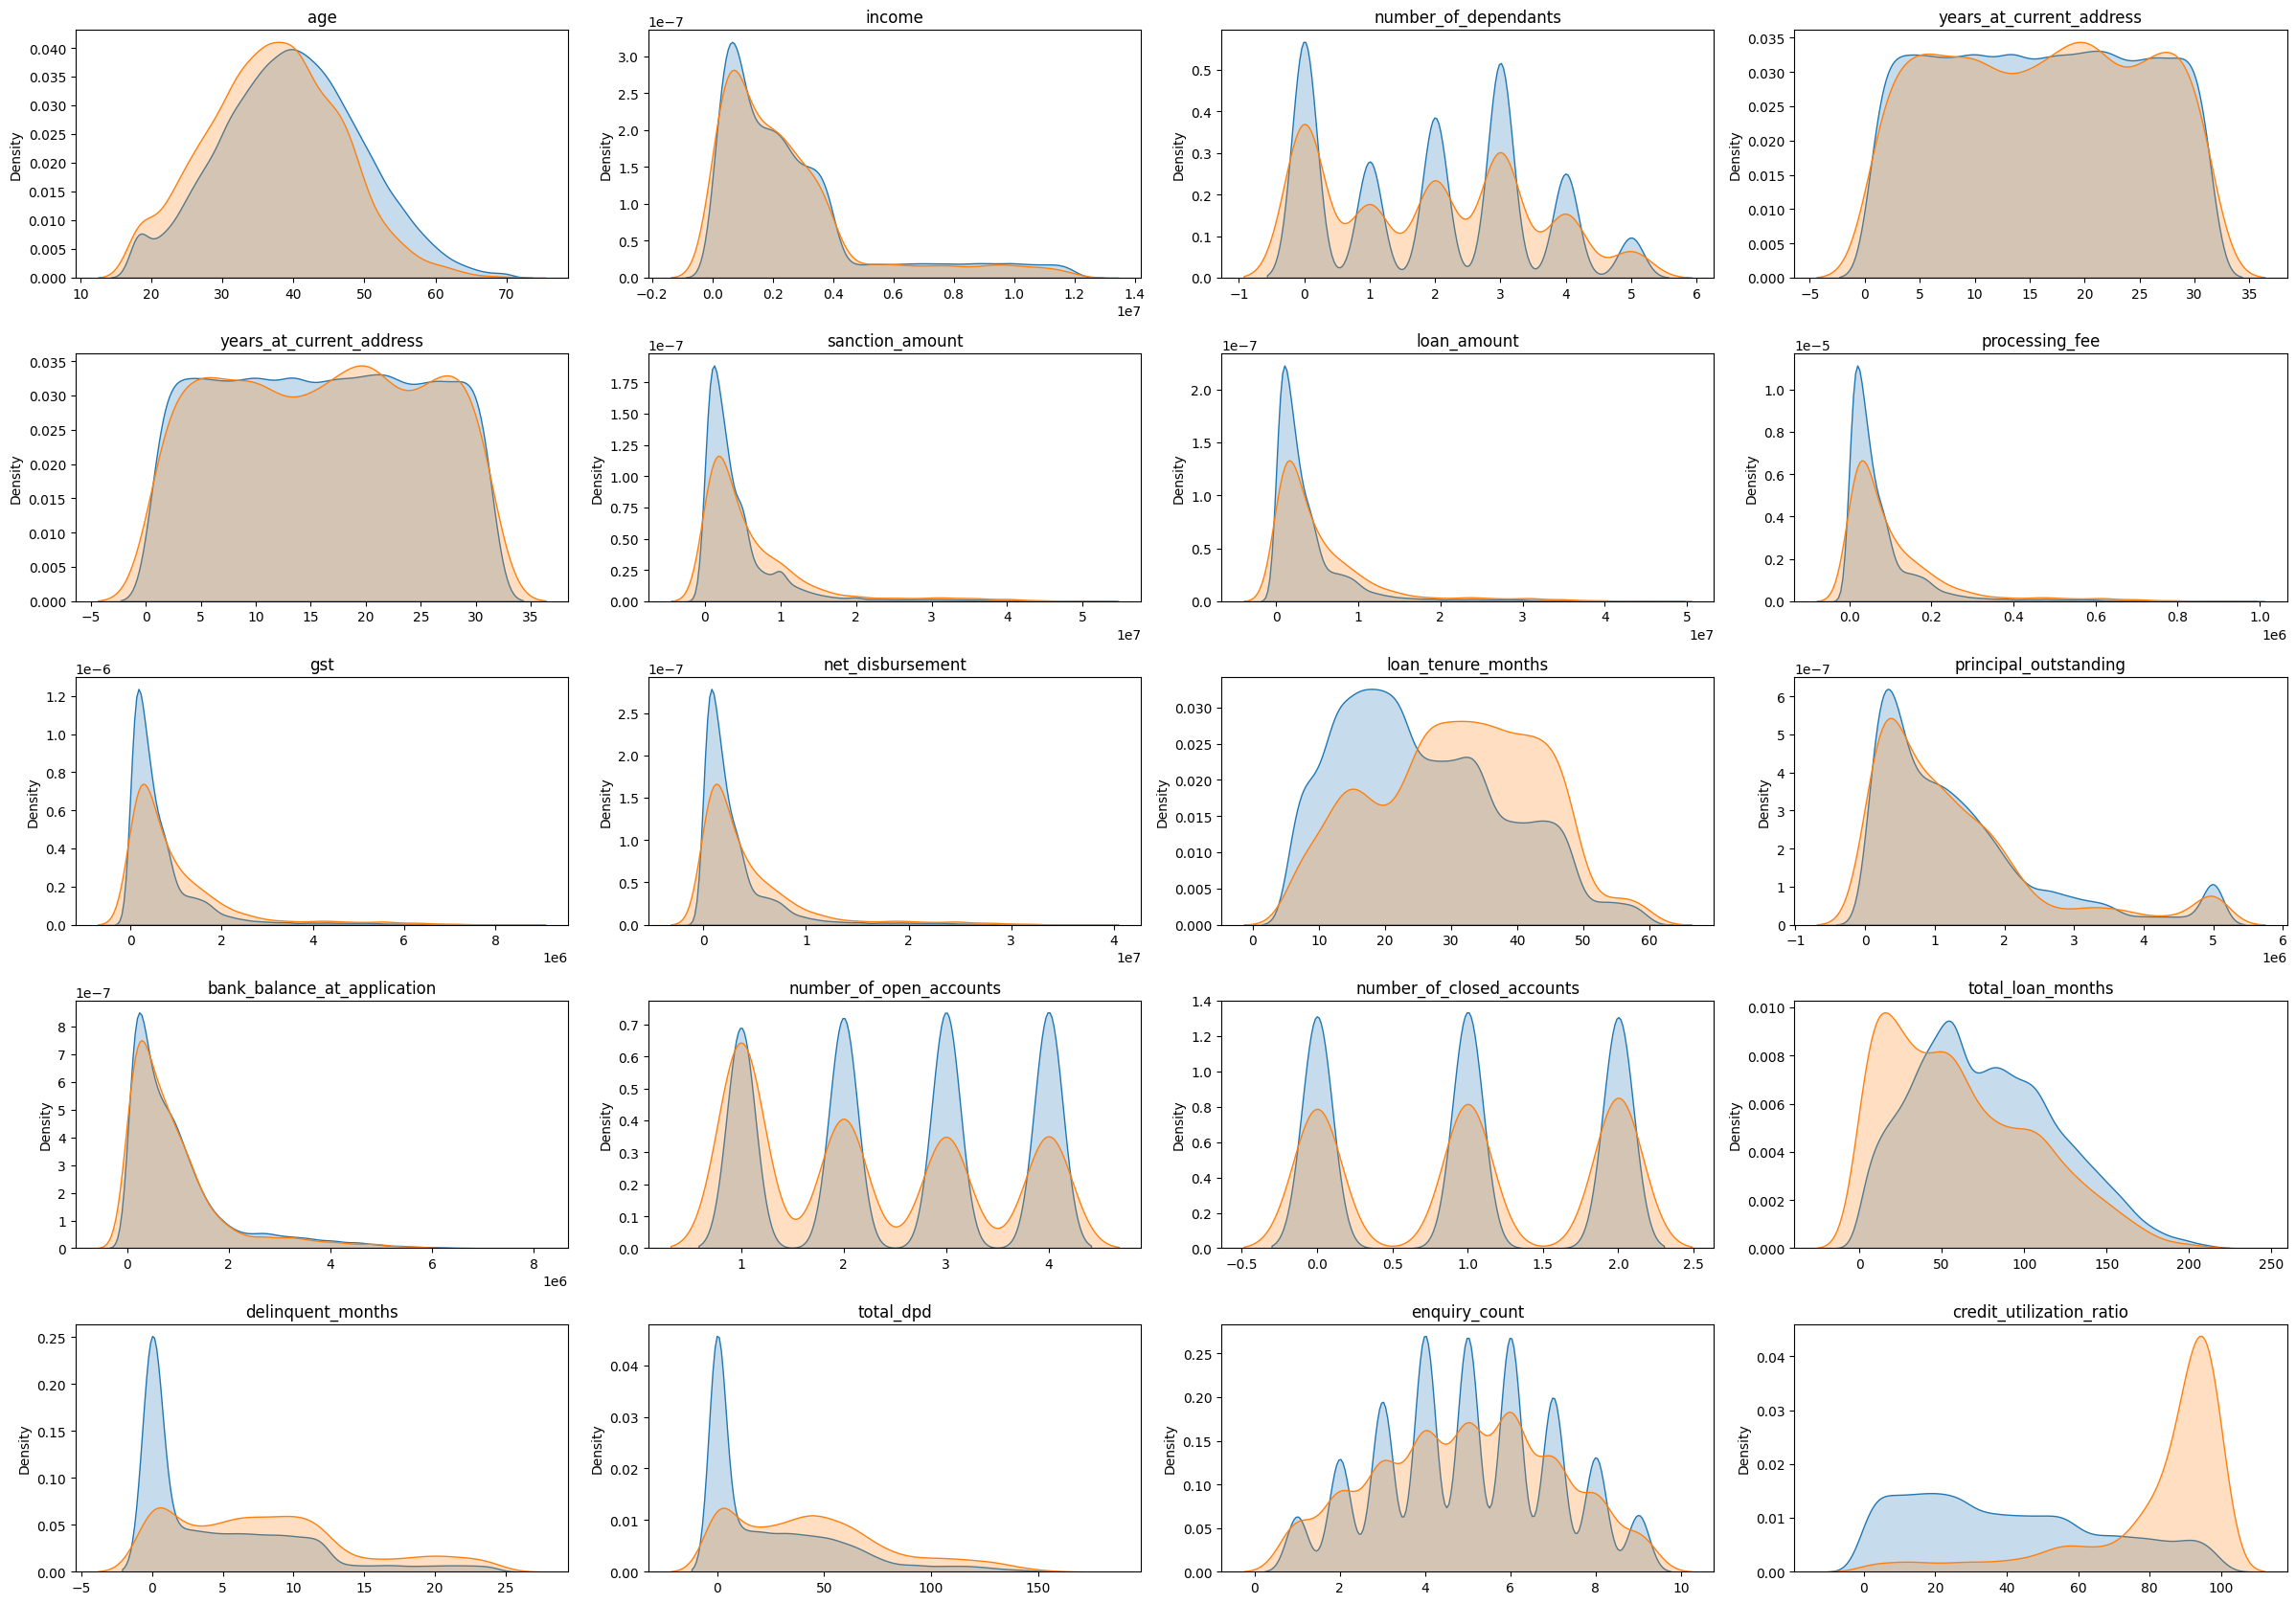

In [163]:
plt.figure(figsize=(24,20))
for i,col in enumerate(columns_continuous):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[df_train_1.default==0][col],fill=True,label="Default=0")
    sns.kdeplot(df_train_1[df_train_1.default==1][col],fill=True,label="Default=1")
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()
    

### FEATURE ENGINEERING

In [164]:
df_train_1["loan_to_income"]=round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_train_1["loan_to_income"][1]


3.22

In [165]:
df_test_1.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0


In [166]:
df_test_1["loan_to_income"]=round(df_test_1["loan_amount"]/df_test_1["income"],2)
df_test_1.head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-07-23,2,1,42,0,0,5,98,0,2.65
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-18,4,0,125,0,0,5,32,0,1.24
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-21,3,0,76,0,0,6,82,0,1.07
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2023-02-04,4,2,125,3,21,7,48,0,2.74
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,2023-10-17,3,1,131,14,89,8,97,1,2.04


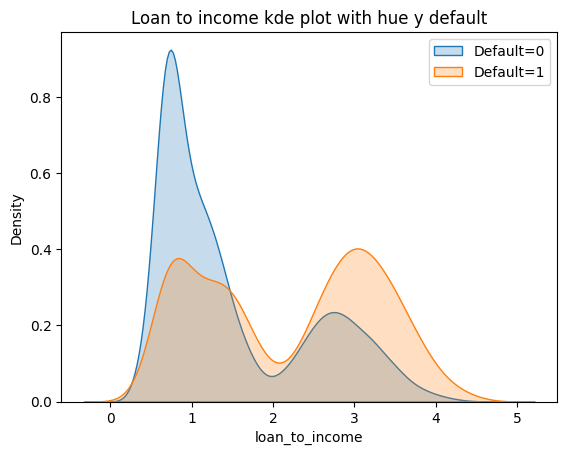

In [167]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'],fill=True,label="Default=1")
plt.title("Loan to income kde plot with hue y default")
plt.legend()
plt.show()

In [168]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [169]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


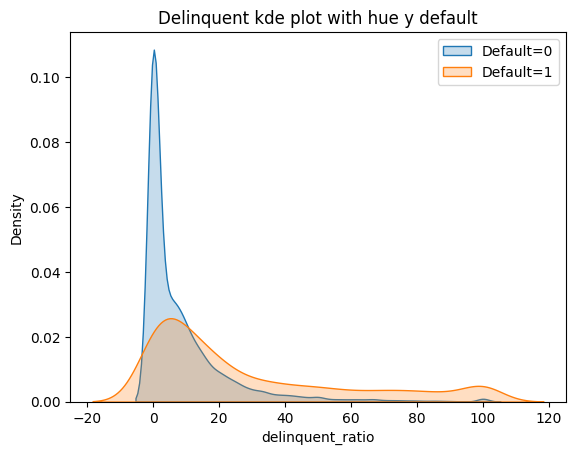

In [170]:
df_train_1["delinquent_ratio"]=round(df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"],2)
df_train_1["delinquent_ratio"].describe()
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquent_ratio'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquent_ratio'],fill=True,label="Default=1")
plt.title("Delinquent kde plot with hue y default")
plt.legend()
plt.show()


In [171]:
df_test_1["delinquent_ratio"]=round(df_test_1["delinquent_months"]*100/df_test_1["total_loan_months"],2)
df_test_1["delinquent_ratio"].describe()

count   12497.00
mean       10.61
std        17.31
min         0.00
25%         0.00
50%         4.21
75%        13.39
max       100.00
Name: delinquent_ratio, dtype: float64

In [172]:
df_train_1['avg_dpd_per_deliquency']=np.where(
    df_train_1['delinquent_months']!=0,
    (df_train_1["total_dpd"]/df_train_1['delinquent_months']).round(1),
    0
)

df_train_1['avg_dpd_per_deliquency'].describe()

count   37488.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.72
max        10.00
Name: avg_dpd_per_deliquency, dtype: float64

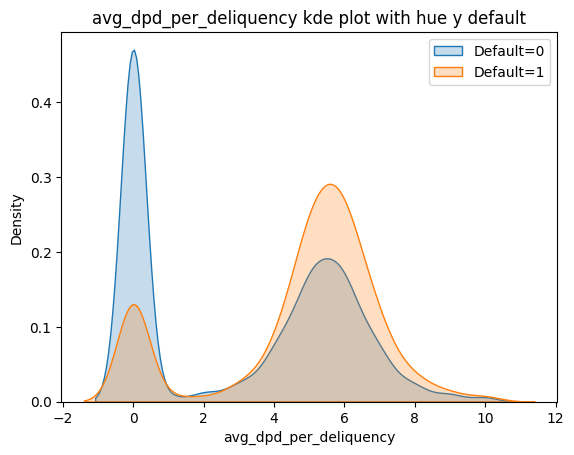

In [173]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_deliquency'],fill=True,label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_deliquency'],fill=True,label="Default=1")
plt.title("avg_dpd_per_deliquency kde plot with hue y default")
plt.legend()
plt.show()

In [174]:
df_test_1['avg_dpd_per_deliquency']=np.where(
    df_test_1['delinquent_months']!=0,
    (df_test_1["total_dpd"]/df_test_1['delinquent_months']).round(1),
    0
)

df_test_1['avg_dpd_per_deliquency'].describe()

count   12497.00
mean        3.34
std         2.90
min         0.00
25%         0.00
50%         4.40
75%         5.80
max        10.00
Name: avg_dpd_per_deliquency, dtype: float64

#### FEATURE SELECTON

In [175]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [176]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis="columns")
df_test_2=df_test_1.drop(['cust_id','loan_id'],axis="columns")

In [177]:
df_train_3=df_train_2.drop(['disbursal_date','installment_start_dt','income','loan_amount','total_loan_months', 'delinquent_months','total_dpd'],axis="columns")
df_test_3=df_test_2.drop(['disbursal_date','installment_start_dt','income','loan_amount','total_loan_months', 'delinquent_months','total_dpd'],axis="columns")

In [178]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [179]:
df_train_3.select_dtypes(["int64","float64"]).columns


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [180]:
X_train = df_train_3.drop('default',axis='columns')
y_train=df_train_3['default']
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=df_train_3.select_dtypes(["int64","float64"]).columns
scaler=MinMaxScaler()
X_train[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [181]:
X_test = df_test_3.drop('default',axis='columns')
y_test=df_test_3['default']
# from sklearn.preprocessing import MinMaxScaler
# columns_to_scale=df_test_3.select_dtypes(["int64","float64"]).columns
# scaler=MinMaxScaler()
X_test[columns_to_scale]=scaler.transform(X_test[columns_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [183]:
calculate_vif(X_train[columns_to_scale])

/home/yashwanth/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [184]:
features_to_drop_vif=['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
X_train_1=X_train.drop(features_to_drop_vif,axis='columns')
numeric_columns=X_train_1.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [185]:
vif_df=calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [186]:
selected_numeric_features_vif=vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_deliquency'], dtype=object)

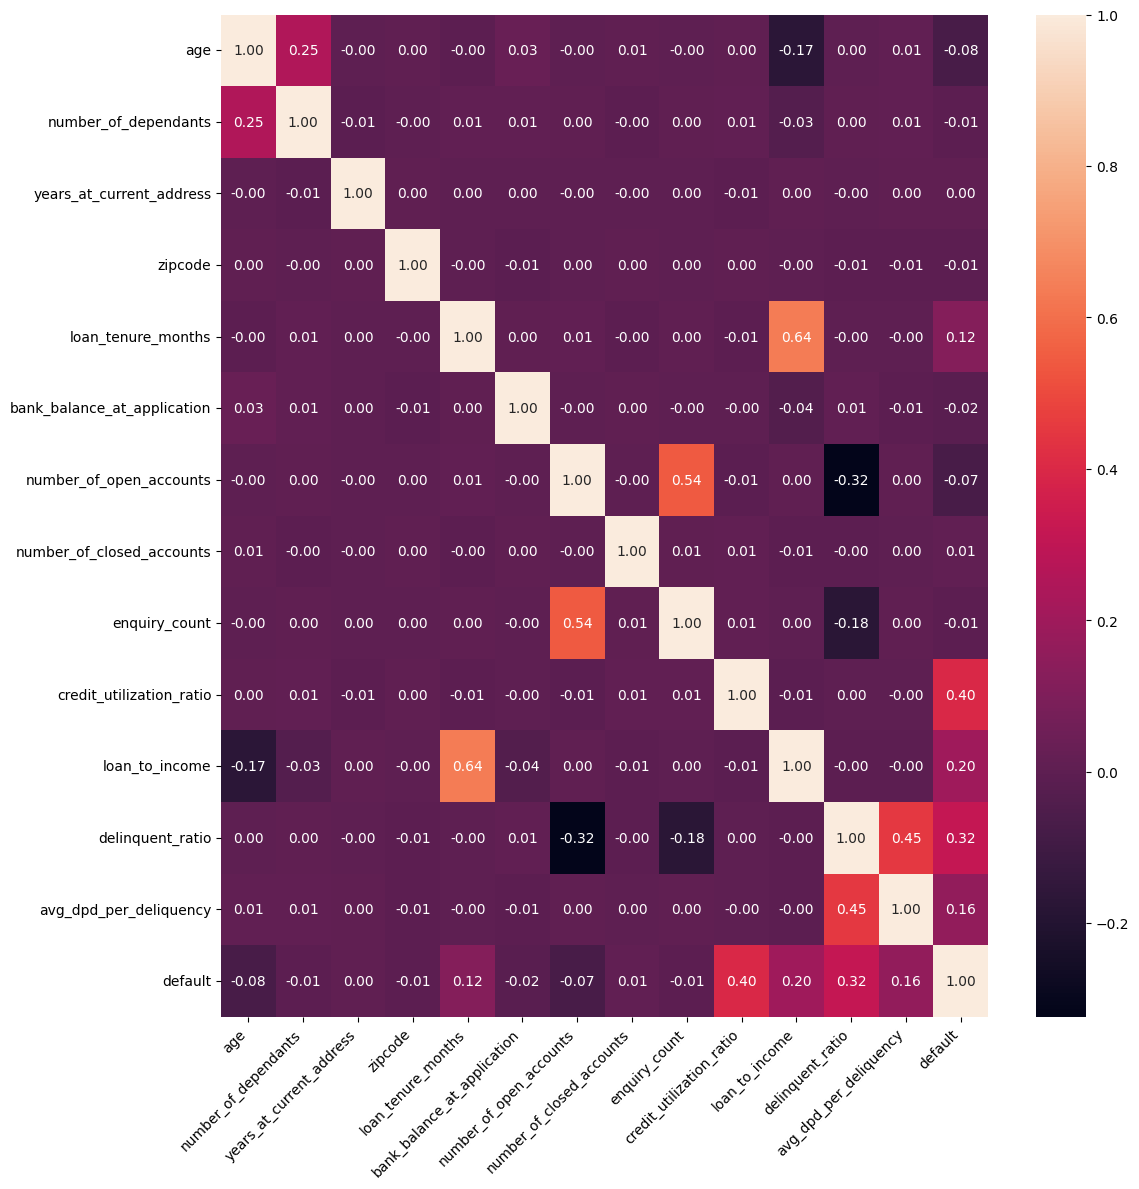

In [187]:
plt.figure(figsize=(12,12))
cm=df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt="0.2f")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [188]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [189]:
temp=pd.concat([X_train_1,y_train],axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [190]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [191]:
def calculate_woa_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']
    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()
    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']=grouped['bad']/total_bad
    grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']=(grouped['good_pct']-grouped['bad_pct'])*grouped['woe']
    grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)

    total_iv=grouped['iv'].sum()
    return grouped,total_iv
    
grouped,total_iv=calculate_woa_iv(pd.concat([X_train_1,y_train],axis=1),'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [192]:
iv_values={}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype=='object':
        _,iv=calculate_woa_iv(pd.concat([X_train_1,y_train],axis=1),feature,'default')
        
    else:
        x_binned=pd.cut(X_train_1[feature],bins=10,labels=False)
        _,iv=calculate_woa_iv(pd.concat([x_binned,y_train],axis=1),feature,'default')
    iv_values[feature]=iv

iv_values
        

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquent_ratio': 0.716576108689321,
 'avg_dpd_per_deliquency': 0.40151905412190175}

In [193]:
iv_values.items()

dict_items([('age', 0.0890689462679479), ('gender', 0.00047449502170914947), ('marital_status', 0.001129766845390142), ('employment_status', 0.003953046301722585), ('number_of_dependants', 0.0019380899135053508), ('residence_type', 0.246745268718145), ('years_at_current_address', 0.0020800513608156363), ('city', 0.0019059578709781529), ('state', 0.0019005589806779287), ('zipcode', 0.0016677413243392572), ('loan_purpose', 0.3691197842282755), ('loan_type', 0.16319324904149224), ('loan_tenure_months', 0.21893515090196278), ('bank_balance_at_application', 0.0063187993277516365), ('number_of_open_accounts', 0.08463134083005877), ('number_of_closed_accounts', 0.0011964272592421567), ('enquiry_count', 0.007864214085342608), ('credit_utilization_ratio', 2.352965568168245), ('loan_to_income', 0.476415456948364), ('delinquent_ratio', 0.716576108689321), ('avg_dpd_per_deliquency', 0.40151905412190175)])

In [194]:
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

iv_df=pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df=iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquent_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_deliquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [195]:
selected_features_iv=[feature for feature,iv in iv_values.items() if iv>0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_deliquency']

#####  FEATURE ENCODING

In [196]:
X_train_reduced=X_train_1[selected_features_iv]
X_test_reduced=X_test[selected_features_iv]
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.222,0.560
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [197]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


### MODEL TRAINING

Attempt 1
1.Logistic Regression,Random Forrest & XGB
2.No handling of class Imbalance

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.70      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [200]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train_encoded,y_train)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.77      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.88      0.89     12497
weighted avg       0.96      0.97      0.96     12497



In [201]:
from sklearn.model_selection import RandomizedSearchCV
param_list={
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','saga','liblinear','newton-cg']
}

log_reg = LogisticRegression(max_iter=10000)
random_search=RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_list,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)
random_search.fit(X_train_encoded,y_train)
best_model=random_search.best_estimator_
y_pred=best_model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Attempt 2
1.Logistic Regression & XGB
2.Handle class imbalane using under Sampling

In [202]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497

[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.3s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.2s
[CV] END .............C=0.00026366508987303583, solver=lbfgs; total time=   0.2s
[CV] END .................C=0.23357214690901212, solver=saga; total time=   0.5s
[CV] END ...................C=4.281332398719396, solver=saga; total time=   0.5s
[CV] END ...............C=0.0006951927961775605, solver=saga; total time=   0.4s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.4s
[CV] END ...............C=0.004832930238571752, solver=lbfgs; total time=   0.2s
[CV] END ..............C=

In [206]:
from xgboost import XGBClassifier
model=XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.56      0.96      0.71      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



/home/yashwanth/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:54:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)


ATTEMPT 3
1.LOgistic Regression
2.Handle class imbalance usng smote toek
3.Parameter tunning using optuna


In [207]:
from imblearn.combine import  SMOTETomek
smt=SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)
y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

#### OPTUNA

In [209]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score


/home/yashwanth/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [213]:
# Define the objective function for optuna
def objective(trial):
    # Suggest hyperparameters
    params={
        'solver' : trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'saga']),
        'C' : trial.suggest_float('C', 1e-4, 1e4,log=True),
        'tol':trial.suggest_float('tol',1e-6,1e-1,log=True),
        'class_weight':trial.suggest_categorical('class_weight',[None,'balanced'])
    }
    
        # Create Logistic Regression model
    model = LogisticRegression(**params, max_iter=1000)
    f1_scorer=make_scorer(f1_score,average='macro')
    scores=cross_val_score(model,X_train_smt,y_train_smt,cv=3,scoring=f1_scorer,n_jobs=-1)
    return np.mean(scores)

study_logistic=optuna.create_study(direction='maximize')
study_logistic.optimize(objective,n_trials=50)

[I 2024-10-09 11:26:17,190] A new study created in memory with name: no-name-3ff3d09b-e4bd-4f06-9983-94eadbb00af5
[I 2024-10-09 11:26:18,946] Trial 0 finished with value: 0.9436770748612343 and parameters: {'solver': 'saga', 'C': 0.2589517183338746, 'tol': 0.006104529467291137, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9436770748612343.
[I 2024-10-09 11:26:20,009] Trial 1 finished with value: 0.942166715911671 and parameters: {'solver': 'newton-cg', 'C': 0.6496947169628298, 'tol': 0.003696177452168616, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9436770748612343.
[I 2024-10-09 11:26:21,127] Trial 2 finished with value: 0.945677803694323 and parameters: {'solver': 'saga', 'C': 910.593779336767, 'tol': 0.0005742381579869762, 'class_weight': None}. Best is trial 2 with value: 0.945677803694323.
[I 2024-10-09 11:26:22,075] Trial 3 finished with value: 0.9077214025078458 and parameters: {'solver': 'liblinear', 'C': 0.004170386239161643, 'tol': 0.0046034528562

In [214]:
trial=study_logistic.best_trial
for key,value in trial.params.items():
    print('   {}:{}'.format(key,value))
best_model_logistic=LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt,y_train_smt)
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

   solver:lbfgs
   C:2.4356754262255573
   tol:6.407260238251857e-05
   class_weight:None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [215]:
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [217]:
from sklearn.metrics import roc_curve

propabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,propabilities)
fpr[:10],tpr[:10],thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.16201117, 0.16201117, 0.17783985,
        0.17783985, 0.21787709, 0.21787709, 0.22905028, 0.22905028]),
 array([       inf, 1.        , 0.9994006 , 0.9993779 , 0.99926124,
        0.99925417, 0.99865373, 0.99865209, 0.99835635, 0.99831968]))

In [219]:
from sklearn.metrics import auc
area=auc(fpr,tpr)
area

0.983678018359835

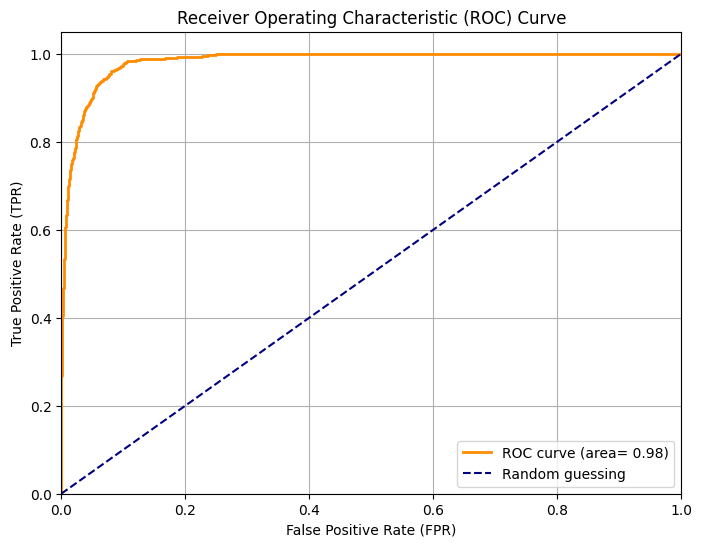

In [220]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area= %0.2f)' % area)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random guessing')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.grid()
plt.show()

In [232]:
probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]
df_eval=pd.DataFrame({
    
    'Default_Truth':y_test,
    'Default_propability':propabilities,
})
df_eval

,Default_Truth,Default_propability
19205,0,0.542
15514,0,0.000
30367,0,0.006
35347,0,0.007
41814,1,0.924
...,...,...
29297,0,0.001
20567,0,0.000
681,0,0.003
33682,0,0.831


In [233]:
df_eval['Decile'] = pd.qcut(df_eval['Default_propability'],10,labels=False,duplicates='drop')
df_eval.head(3)

,Default_Truth,Default_propability,Decile
19205,0,0.542,8
15514,0,0.000,2
30367,0,0.006,6


In [235]:
df_grouped=df_eval.groupby('Decile').apply(lambda x:pd.Series({
    'Minimum_Propability':x['Default_propability'].min(),
    'Maximum_Propability':x['Default_propability'].max(),
    'Events':x['Default_Truth'].sum(),
    'Non-events':x['Default_Truth'].count()-x['Default_Truth'].sum(),
}))
df_grouped.reset_index(inplace=True)
df_grouped

/tmp/ipykernel_6534/1259221083.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped=df_eval.groupby('Decile').apply(lambda x:pd.Series({


,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.030,5.000,1245.000
7,7,0.030,0.218,11.000,1238.000
8,8,0.218,0.818,161.000,1089.000
9,9,0.818,1.000,897.000,353.000


In [237]:
df_grouped=df_grouped.sort_values(by='Decile',ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events
0,9,0.818,1.000,897.000,353.000
1,8,0.218,0.818,161.000,1089.000
2,7,0.030,0.218,11.000,1238.000
3,6,0.005,0.030,5.000,1245.000
4,5,0.001,0.005,0.000,1249.000
5,4,0.000,0.001,0.000,1250.000
6,3,0.000,0.000,0.000,1250.000
7,2,0.000,0.000,0.000,1249.000
8,1,0.000,0.000,0.000,1250.000
9,0,0.000,0.000,0.000,1250.000


In [239]:
df_grouped['Event_Rate']=df_grouped['Events']*100/(df_grouped['Events']+df_grouped['Non-events'])
df_grouped['Non Event_Rate']=df_grouped['Non-events']*100/(df_grouped['Events']+df_grouped['Non-events'])
df_grouped


,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events,Event_Rate,Non Event_Rate
0,9,0.818,1.000,897.000,353.000,71.760,28.240
1,8,0.218,0.818,161.000,1089.000,12.880,87.120
2,7,0.030,0.218,11.000,1238.000,0.881,99.119
3,6,0.005,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [241]:
df_grouped['Cum Events']=df_grouped['Events'].cumsum()
df_grouped['Cum Non-Events']=df_grouped['Non-events'].cumsum()
df_grouped


,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events,Event_Rate,Non Event_Rate,Cum Events,Cum Non-Events
0,9,0.818,1.000,897.000,353.000,71.760,28.240,897.000,353.000
1,8,0.218,0.818,161.000,1089.000,12.880,87.120,1058.000,1442.000
2,7,0.030,0.218,11.000,1238.000,0.881,99.119,1069.000,2680.000
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [244]:
df_grouped['Cum-event-rate']=df_grouped['Cum Events']*100/df_grouped['Events'].sum()
df_grouped['Cum-Non-event-rate']=df_grouped['Cum Non-Events']*100/df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events,Event_Rate,Non Event_Rate,Cum Events,Cum Non-Events,Cum-event-rate,Cum-Non-event-rate
0,9,0.818,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090
1,8,0.218,0.818,161.000,1089.000,12.880,87.120,1058.000,1442.000,98.510,12.624
2,7,0.030,0.218,11.000,1238.000,0.881,99.119,1069.000,2680.000,99.534,23.461
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [245]:
df_grouped['KS']=abs(df_grouped['Cum-event-rate']-df_grouped['Cum-Non-event-rate'])
df_grouped

,Decile,Minimum_Propability,Maximum_Propability,Events,Non-events,Event_Rate,Non Event_Rate,Cum Events,Cum Non-Events,Cum-event-rate,Cum-Non-event-rate,KS
0,9,0.818,1.000,897.000,353.000,71.760,28.240,897.000,353.000,83.520,3.090,80.429
1,8,0.218,0.818,161.000,1089.000,12.880,87.120,1058.000,1442.000,98.510,12.624,85.887
2,7,0.030,0.218,11.000,1238.000,0.881,99.119,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


#### MODEL EXTRACTON BU JOBLIB

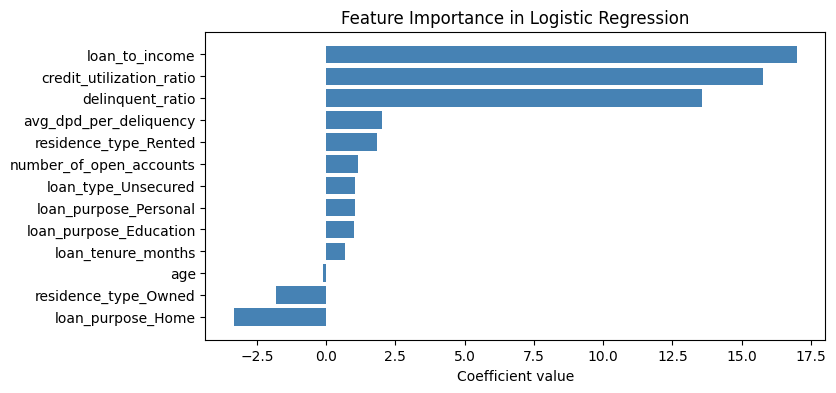

In [248]:
final_model=best_model_logistic
feature_importance=final_model.coef_[0]

coef_df=pd.DataFrame(feature_importance,index=X_train_encoded.columns,columns=['Coefficients'])
coef_df=coef_df.sort_values(by='Coefficients',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coefficient value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [250]:
from joblib import dump
model_data={
    'model':final_model,
    'features':X_train_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':columns_to_scale
}
dump(model_data,'artifacts/model_data.joblib')
    

['artifacts/model_data.joblib']

In [251]:
final_model.coef_,final_model.intercept_

(array([[-0.10548993,  0.67061474,  1.16136192, 15.77628862, 17.01128351,
         13.58821364,  2.02693415, -1.82680377,  1.82588832,  0.99672901,
         -3.33773172,  1.0390479 ,  1.0390479 ]]),
 array([-20.5029191]))

In [253]:
gini_coefficient=2*area-1
print("AUC:",area)
print('Gini Coefficient:',gini_coefficient)

AUC: 0.983678018359835
Gini Coefficient: 0.9673560367196701
